The aim of this project is to analyze the data and use prescriptive analytics to recommend specific actions for optimizing marketing campaigns and revenue generation.

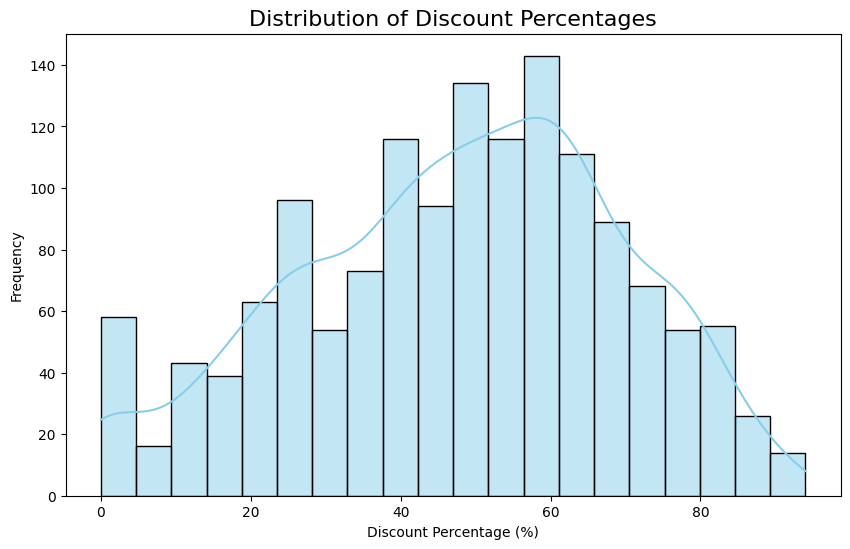

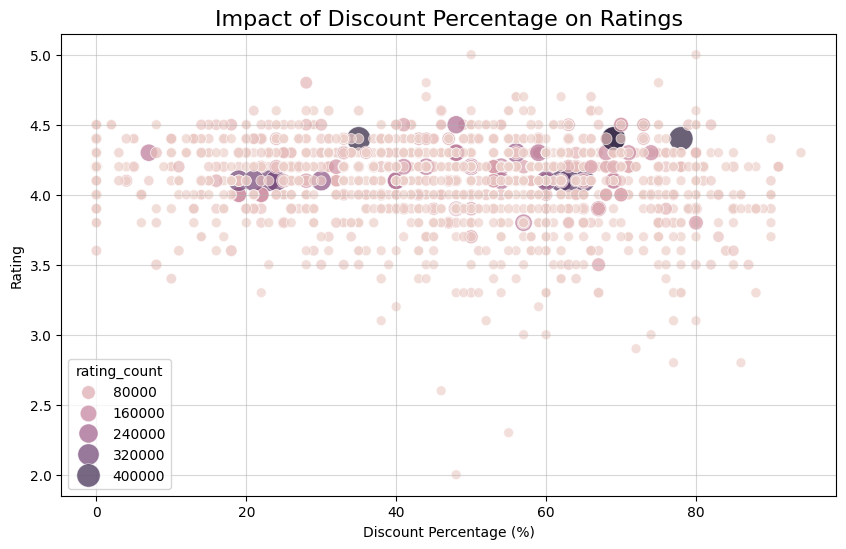

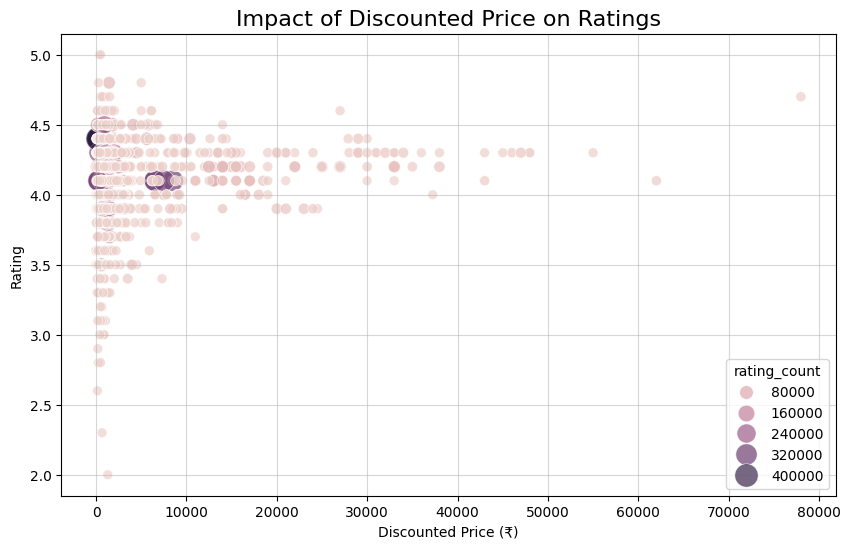

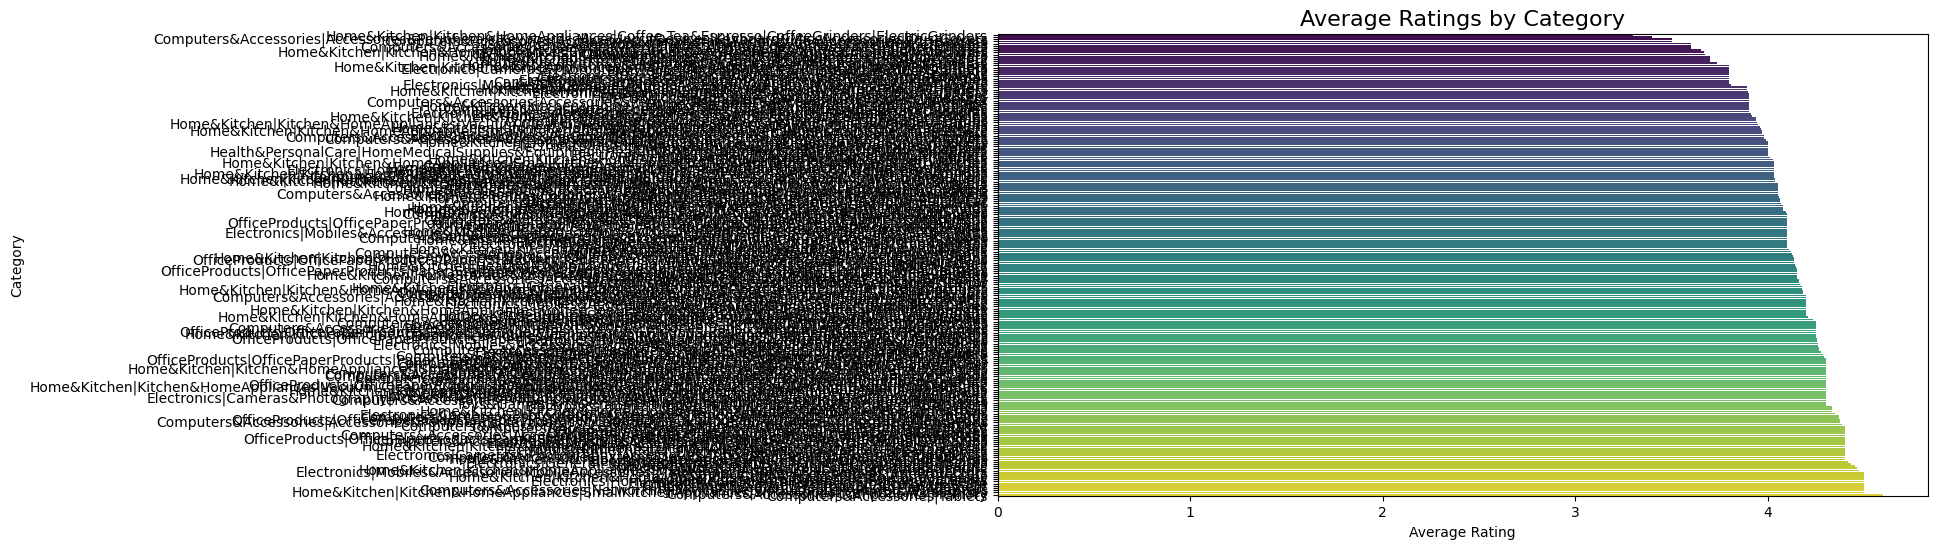

High-Rating Categories to Maximize ROI:
                                              category    rating  \
10   Computers&Accessories|Accessories&Peripherals|...  4.153247   
117  Electronics|Mobiles&Accessories|Smartphones&Ba...  4.100000   
89   Electronics|HomeTheater,TV&Video|Accessories|C...  4.254167   
119        Electronics|WearableTechnology|SmartWatches  4.025000   
58         Electronics|Accessories|MemoryCards|MicroSD  4.330769   
..                                                 ...       ...   
173  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...  4.400000   
36   Computers&Accessories|Components|InternalHardD...  4.200000   
43    Computers&Accessories|Laptops|TraditionalLaptops  4.000000   
106  Electronics|Mobiles&Accessories|MobileAccessor...  4.400000   
81   Electronics|HomeAudio|MediaStreamingDevices|St...  4.500000   

     rating_count  discount_percentage  
10      3547816.0            59.220779  
117     2493269.0            23.294118  
89      1906054.0   

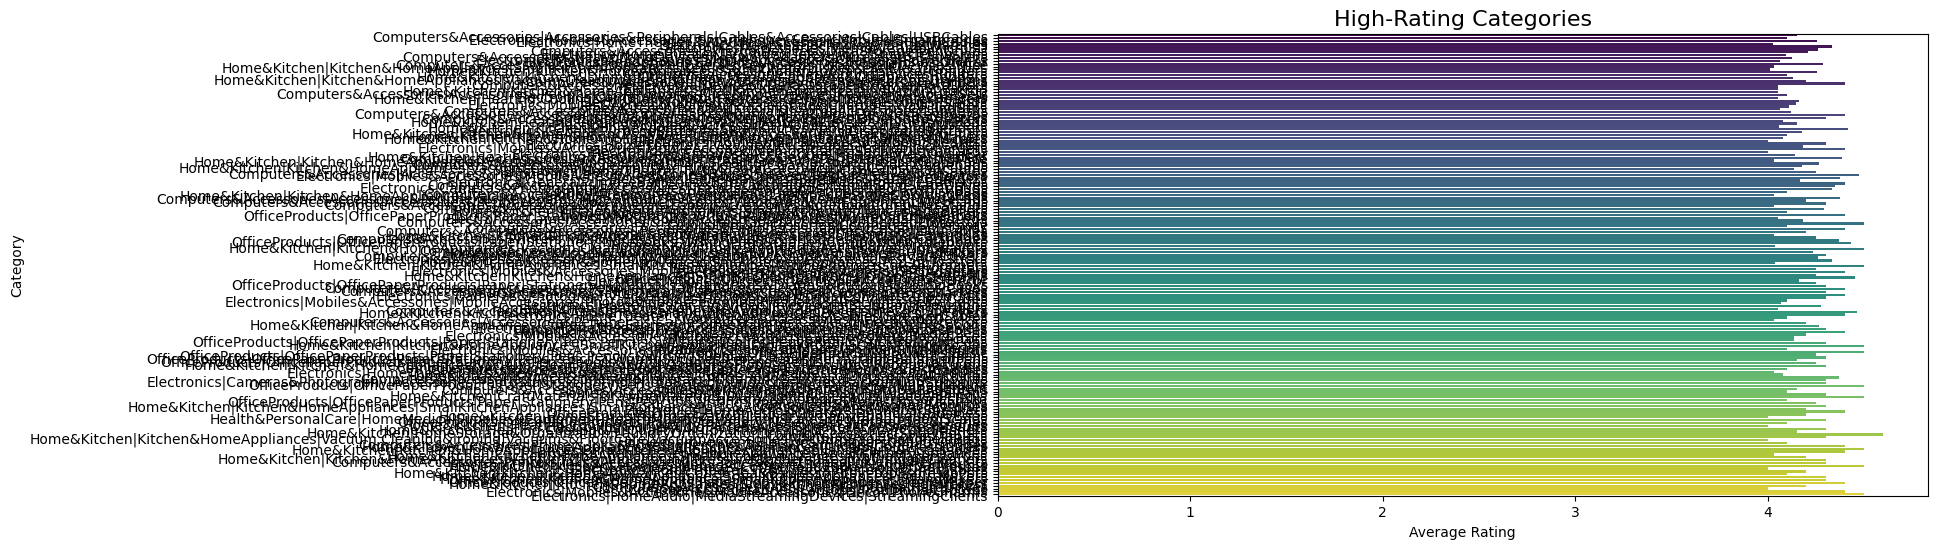

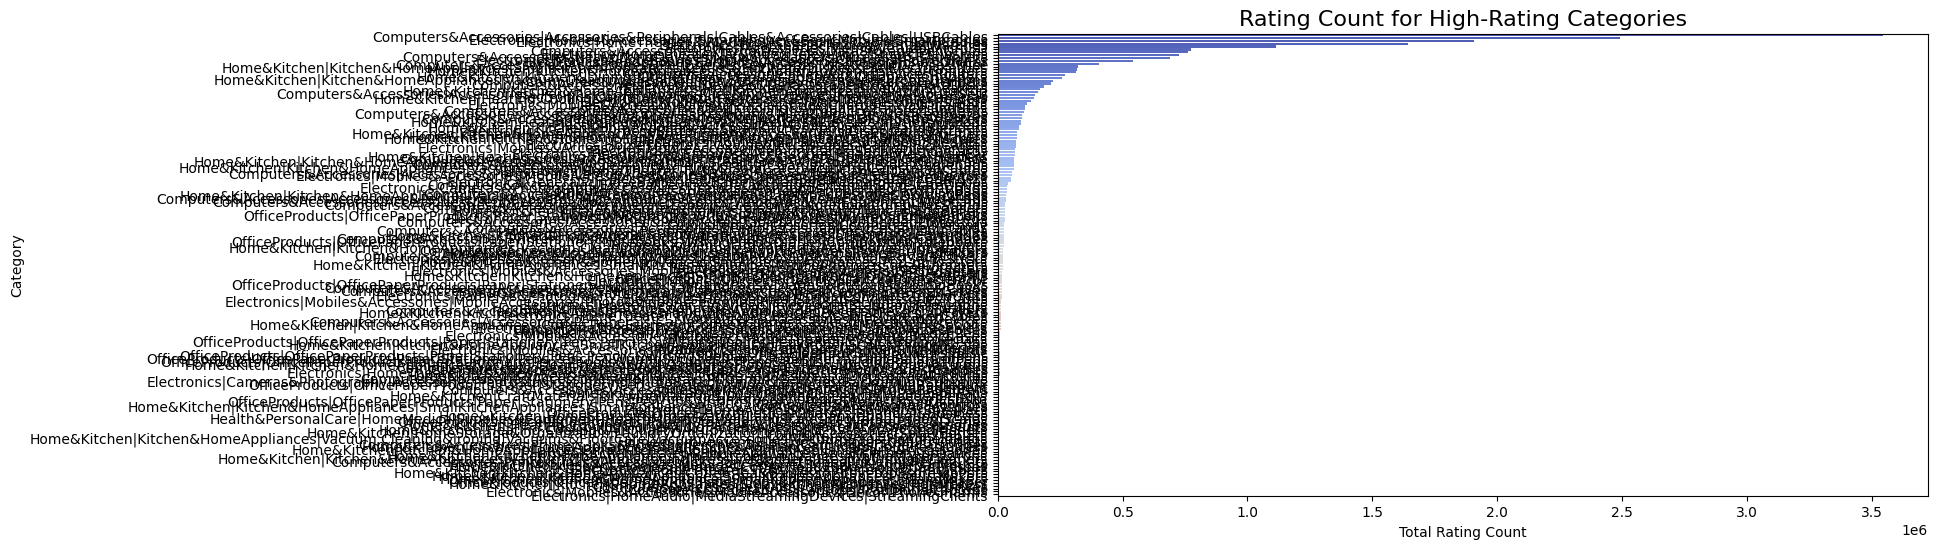

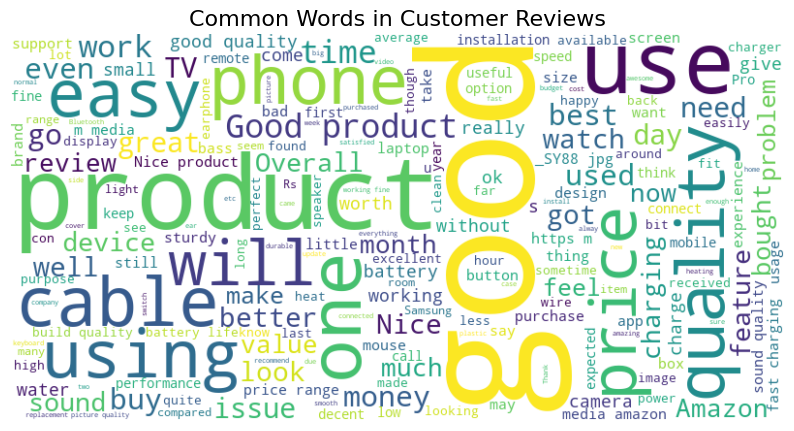

Top Positive Words: [('good', 6445), ('great', 720)]
Top Negative Words: [('bad', 259), ('poor', 112)]

Actionable Insights and Recommendations:
1. Products with moderate discounts (30%-60%) tend to achieve higher ratings.
2. Focus on high-rating categories like Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables to maximize ROI.
3. Address frequent complaints identified in reviews (e.g., durability).
4. Highlight customer-preferred features in campaigns (e.g., fast charging, compatibility).


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Load the dataset
data = pd.read_csv('amazon.csv')

# Data Cleaning and Preprocessing
# Clean price columns (₹, commas) and convert to numeric
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

# Drop missing values (optional, based on relevance)
data.dropna(subset=['rating', 'rating_count'], inplace=True)

# ---- Analysis and Visualizations ---- #

# 1. Distribution of Discounts
plt.figure(figsize=(10, 6))
sns.histplot(data['discount_percentage'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Discount Percentages", fontsize=16)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Frequency")
plt.show()

# 2. Relationship between Discount Percentage and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='discount_percentage', y='rating', hue='rating_count', size='rating_count', sizes=(50, 300), alpha=0.7)
plt.title("Impact of Discount Percentage on Ratings", fontsize=16)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Rating")
plt.grid(True, alpha=0.5)
plt.show()

# 3. Relationship between Discounted Price and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='discounted_price', y='rating', hue='rating_count', size='rating_count', sizes=(50, 300), alpha=0.7)
plt.title("Impact of Discounted Price on Ratings", fontsize=16)
plt.xlabel("Discounted Price (₹)")
plt.ylabel("Rating")
plt.grid(True, alpha=0.5)
plt.show()

# 4. Average Ratings and Discount by Category
category_summary = data.groupby('category').agg({
    'rating': 'mean',
    'discount_percentage': 'mean',
    'rating_count': 'sum'
}).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(
    x='rating',
    y='category',
    data=category_summary.sort_values('rating'),
    hue='category',  # Explicitly assigning hue
    dodge=False,  # Ensures colors are applied without altering layout
    palette='viridis'
)
plt.title("Average Ratings by Category", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.legend([], [], frameon=False)  # Hides the legend for cleaner output
plt.show()


# Aggregate data by category
category_summary = data.groupby('category').agg({
    'rating': 'mean',  # Average rating
    'rating_count': 'sum',  # Total ratings
    'discount_percentage': 'mean'  # Average discount percentage
}).reset_index()

# Filter for high-rating categories (e.g., rating >= 4.0)
high_rating_categories = category_summary[category_summary['rating'] >= 4.0]

# Sort by highest total rating count for popularity
high_rating_categories = high_rating_categories.sort_values('rating_count', ascending=False)

# Display the results
print("High-Rating Categories to Maximize ROI:")
print(high_rating_categories)


# Visualize high-rating categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x='rating',
    y='category',
    data=high_rating_categories,
    hue='category',  # Assign hue to match y
    dodge=False,  # Avoid duplicate bars for each hue
    palette='viridis'
)
plt.title("High-Rating Categories", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.legend([], [], frameon=False)  # Hide legend if not needed
plt.show()

# Visualize rating counts for high-rating categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x='rating_count',
    y='category',
    data=high_rating_categories,
    hue='category',  # Assign hue to match y
    dodge=False,  # Avoid duplicate bars for each hue
    palette='coolwarm'
)
plt.title("Rating Count for High-Rating Categories", fontsize=16)
plt.xlabel("Total Rating Count")
plt.ylabel("Category")
plt.legend([], [], frameon=False)  # Hide legend if not needed
plt.show()


# 5. Word Cloud of Customer Reviews
review_text = " ".join(data['review_content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(review_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Customer Reviews", fontsize=16)
plt.show()

# 6. Sentiment Analysis (Basic Example)
# Extract top positive and negative words based on CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=1000)
words = cv.fit_transform(data['review_content'].dropna())
word_freq = dict(zip(cv.get_feature_names_out(), words.toarray().sum(axis=0)))

top_positive_words = Counter({k: v for k, v in word_freq.items() if 'good' in k or 'great' in k}).most_common(10)
top_negative_words = Counter({k: v for k, v in word_freq.items() if 'bad' in k or 'poor' in k}).most_common(10)

print("Top Positive Words:", top_positive_words)
print("Top Negative Words:", top_negative_words)

# ---- Recommendations ---- #
print("\nActionable Insights and Recommendations:")
print("1. Products with moderate discounts (30%-60%) tend to achieve higher ratings.")
print("2. Focus on high-rating categories like Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables to maximize ROI.")
print("3. Address frequent complaints identified in reviews (e.g., durability).")
print("4. Highlight customer-preferred features in campaigns (e.g., fast charging, compatibility).")
